### **Download the data from:**
### https://snap.stanford.edu/data/sx-stackoverflow.html > sx-stackoverflow.txt.gz (All interactions)
### Create a folder named **source_data** at the same place that this file is and extract the .gz file

In [1]:
from graph import Graph
from helpers import open_file, create_evenly_spaced_time_periods
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import product
from sklearn.linear_model import LogisticRegression

In [2]:
edges = sorted(open_file('./source_data/sx-stackoverflow.txt', n_rows=5_000),
               key=lambda x: x.timestamp )

In [3]:
time_start = edges[0].timestamp
time_end = edges[-1].timestamp
time_periods = 20
time_periods = create_evenly_spaced_time_periods(start=time_start, stop=time_end, n_periods=time_periods)

In [4]:
all_graphs = []
for time_period in time_periods:
    start = time_period[0]
    end = time_period[1]
    if end == time_end:
        end += 1
    g = Graph(edges_list=edges, interval_start=start, interval_end=end)
    all_graphs.append(g)
    del edges[:len(g)]

In [5]:
end_intervals = [subgraph.interval_end_to_datetime() for subgraph in all_graphs]
num_of_vertices = [len(subgraph.vertices) for subgraph in all_graphs]
num_of_edges = [len(subgraph) for subgraph in all_graphs]

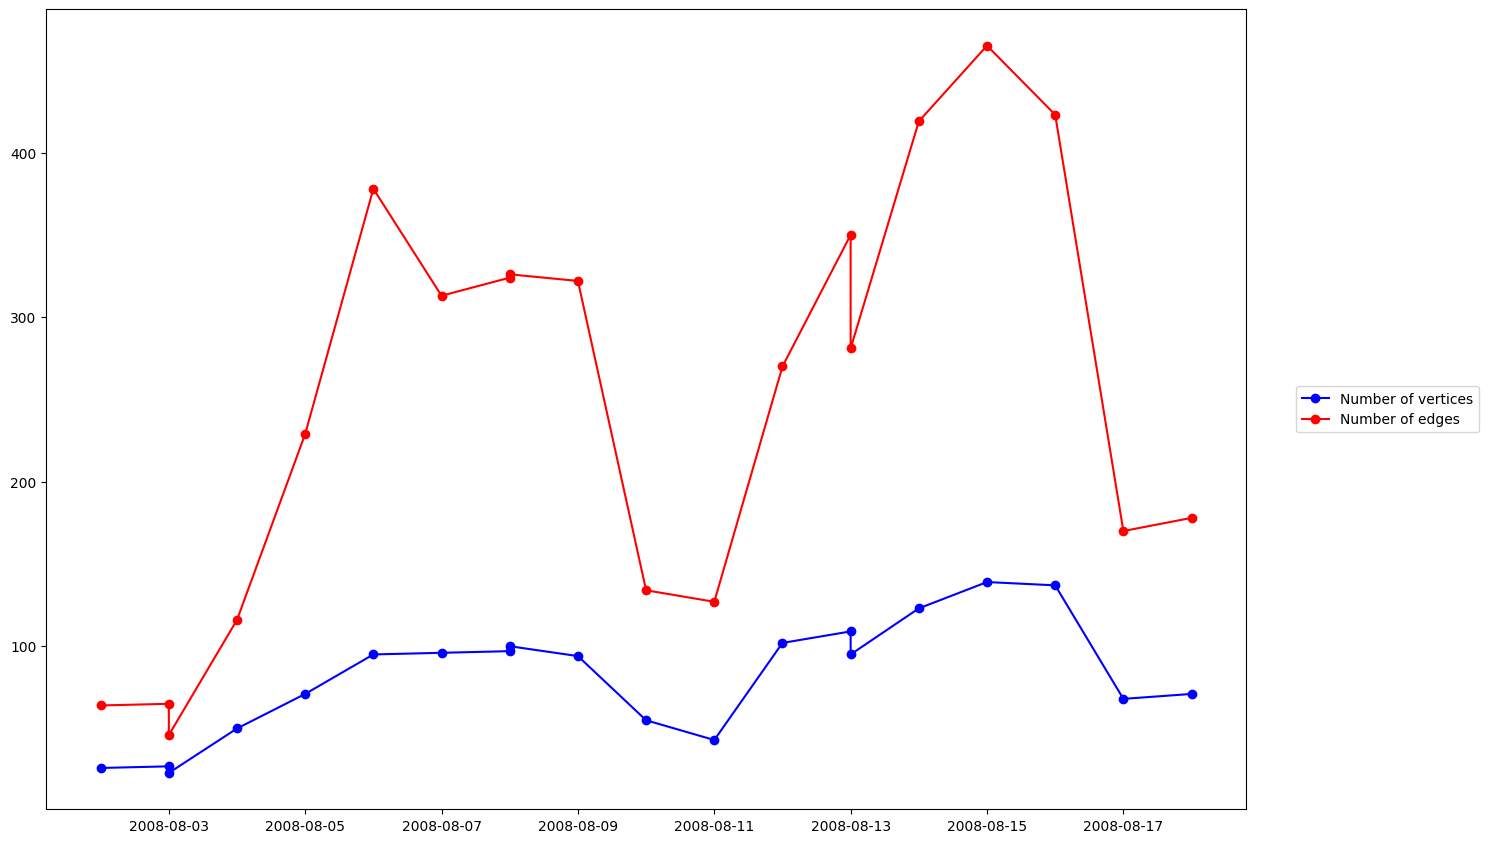

In [6]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(end_intervals, num_of_vertices, label='Number of vertices', color='blue', marker='o')
ax.plot(end_intervals, num_of_edges, label='Number of edges', color='red', marker='o')
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

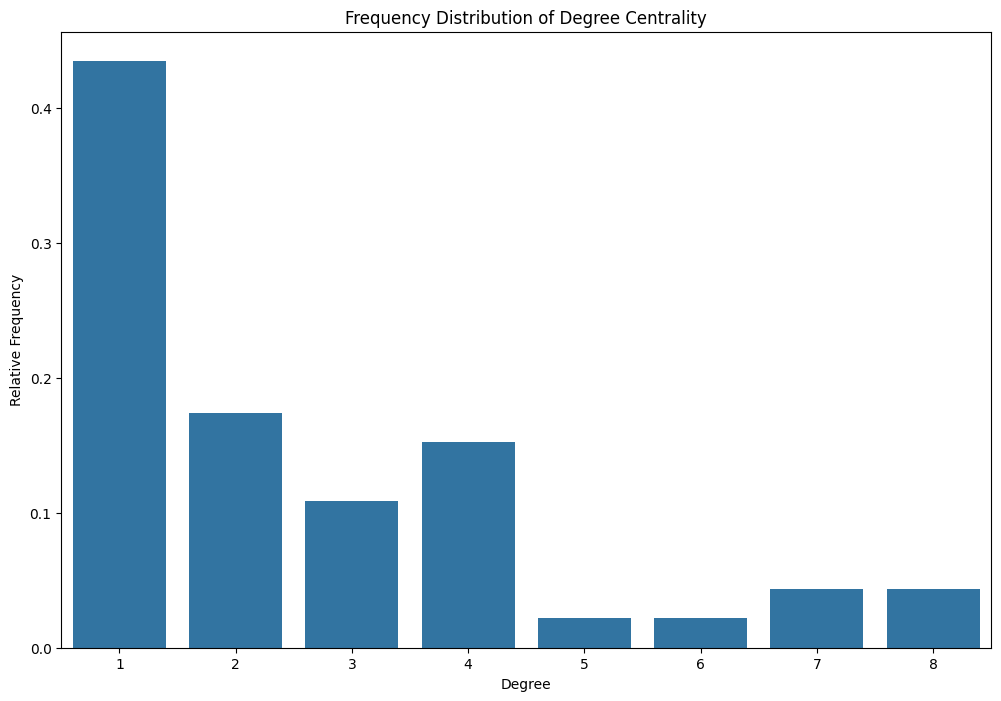

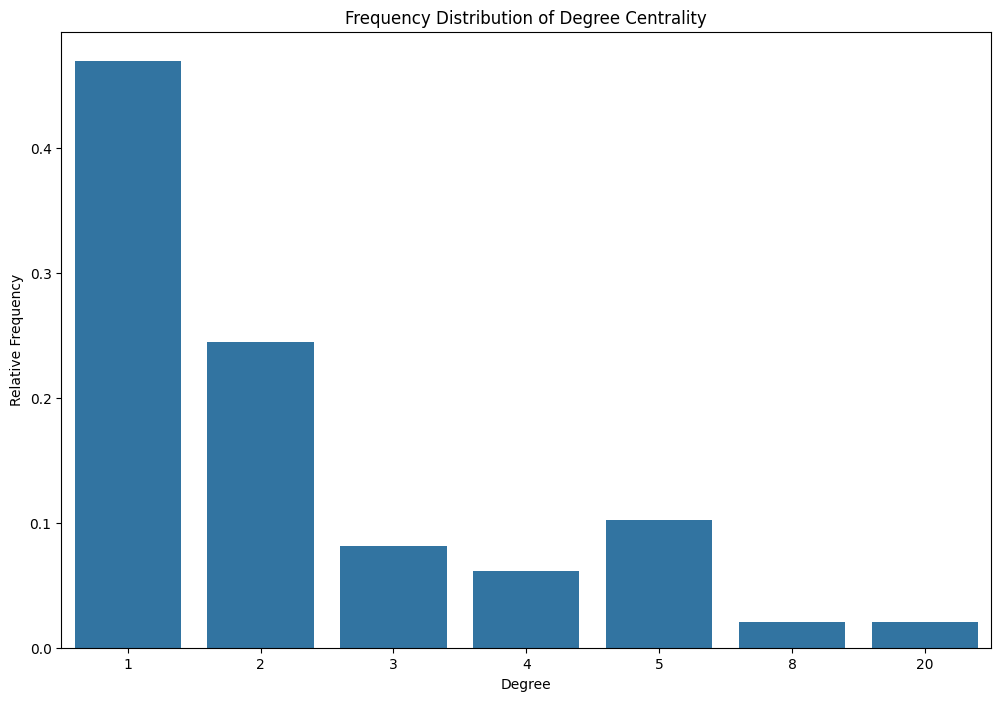

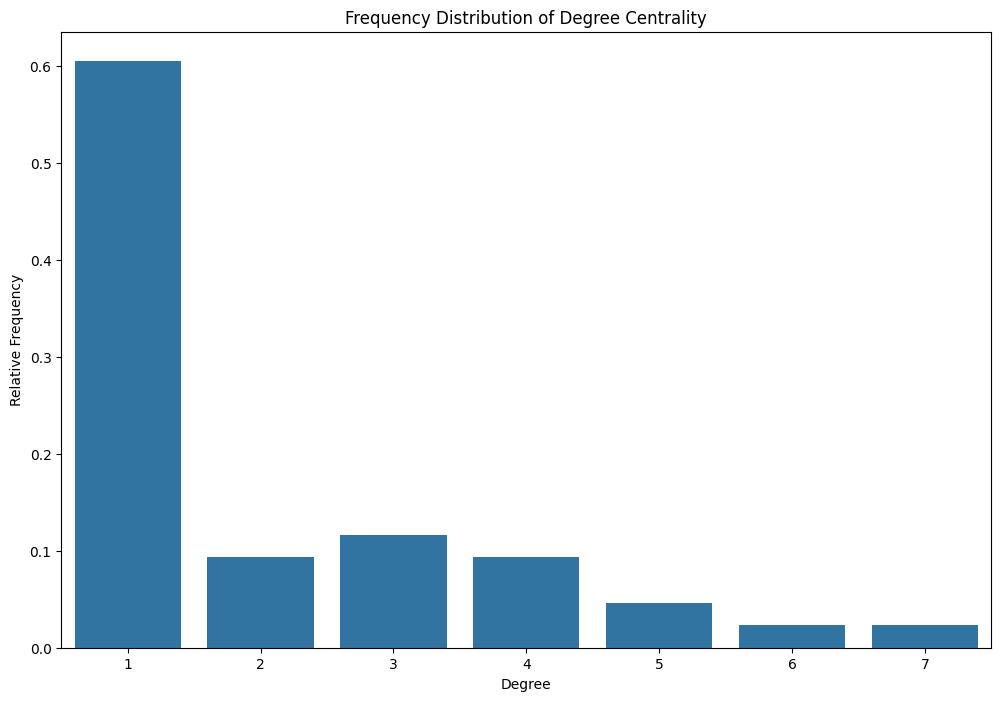

In [7]:
for graph in all_graphs[0:3]:
    graph.plot_degree_centrality()

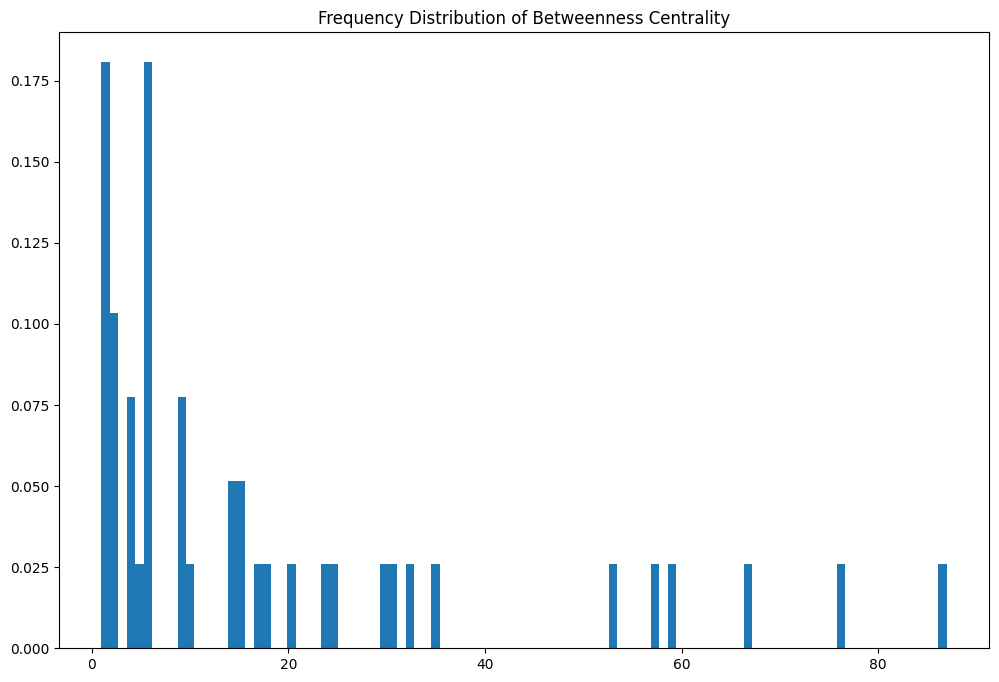

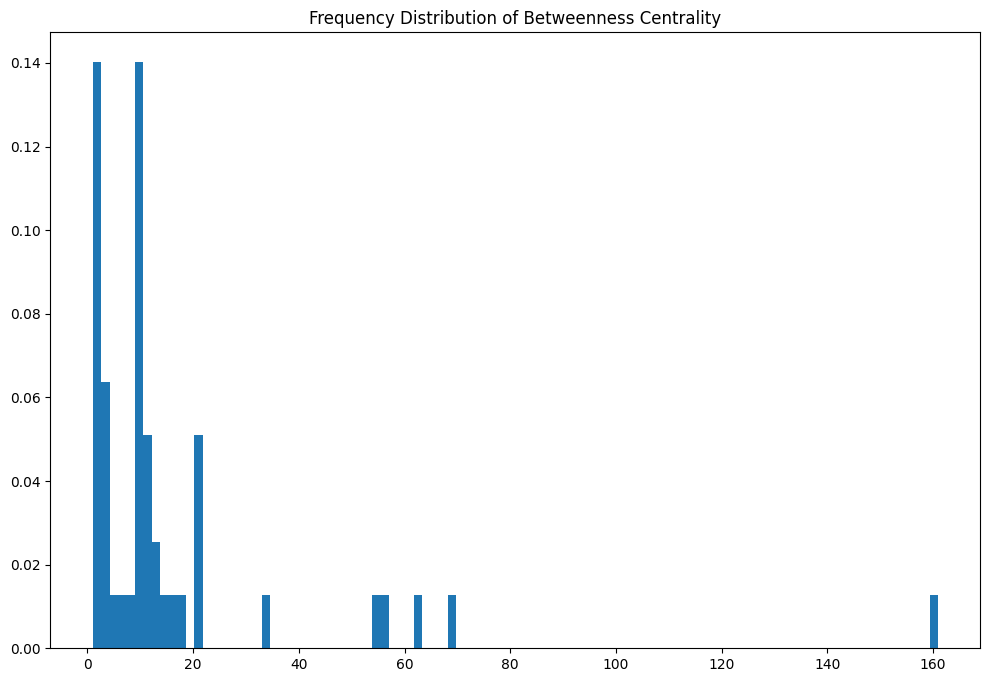

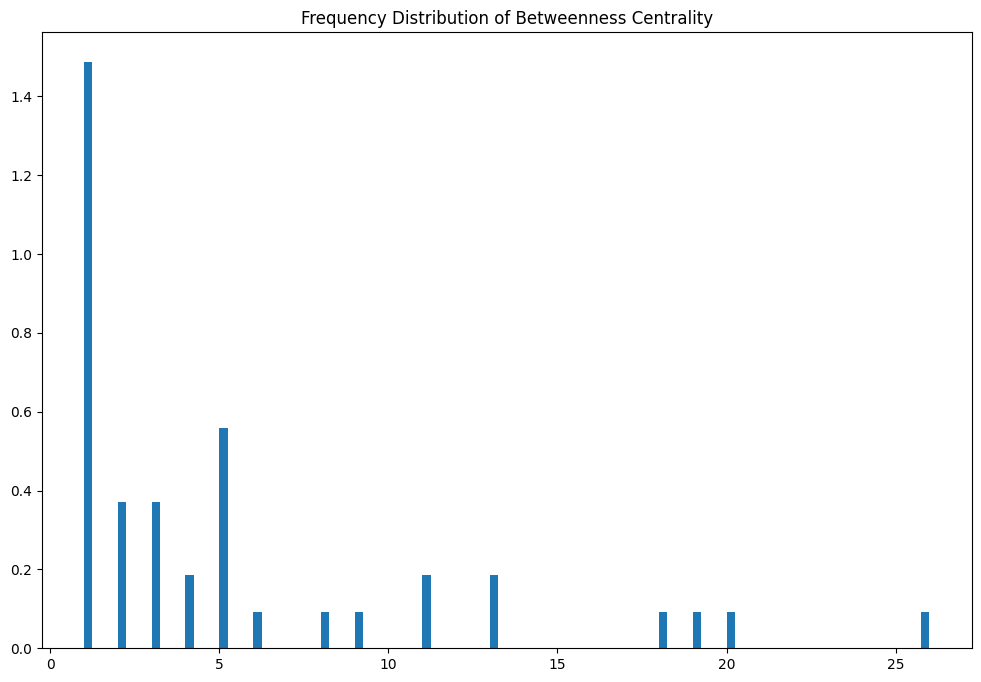

In [8]:
for graph in all_graphs[0:3]:
    graph.plot_betweenness_centrality()

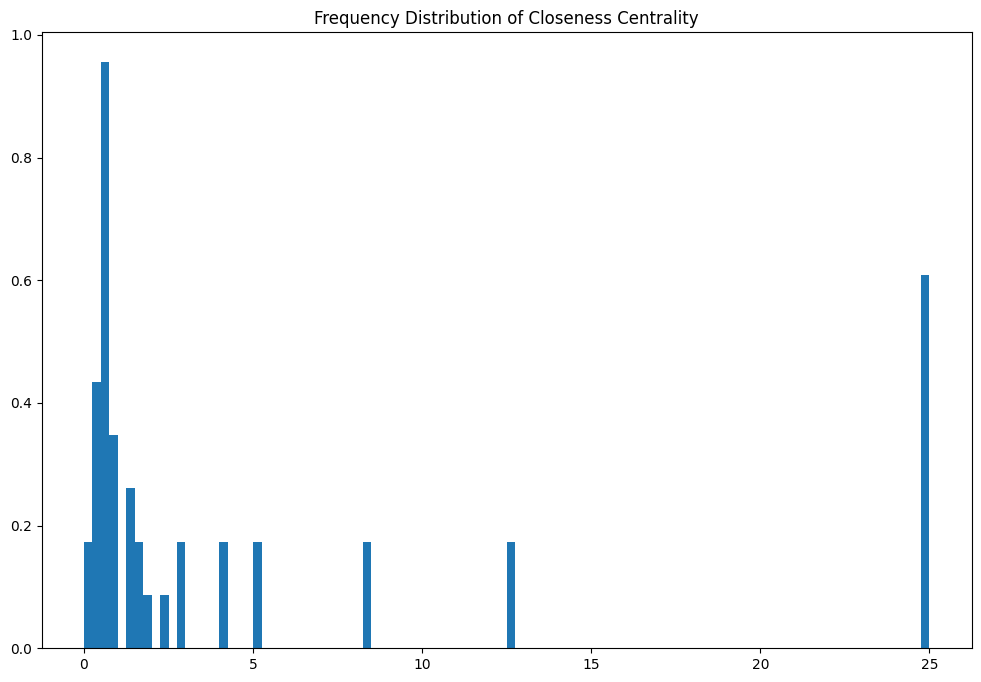

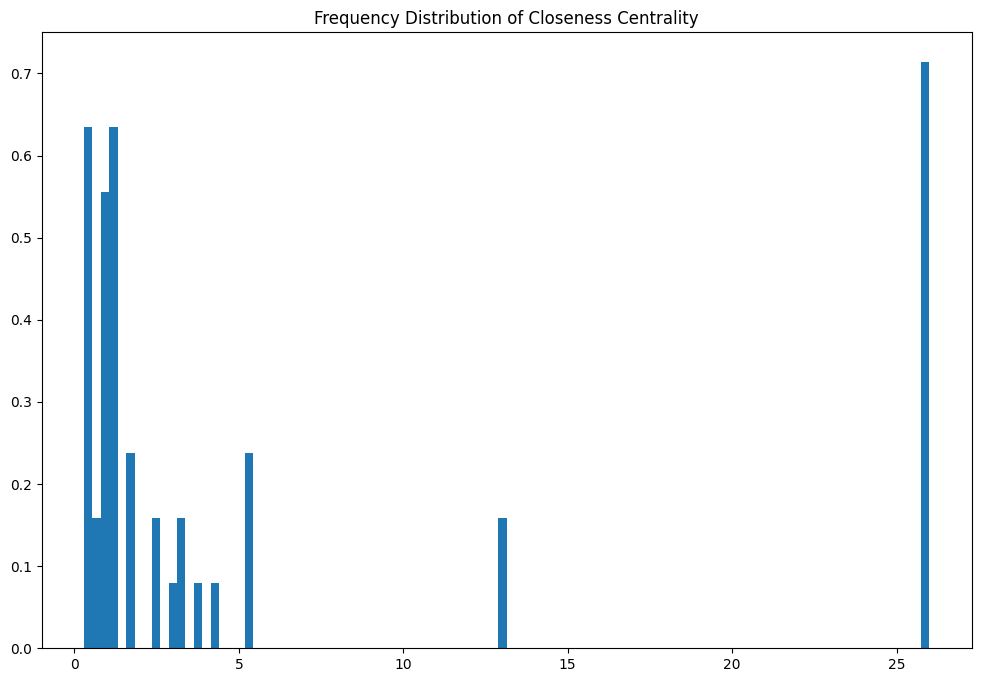

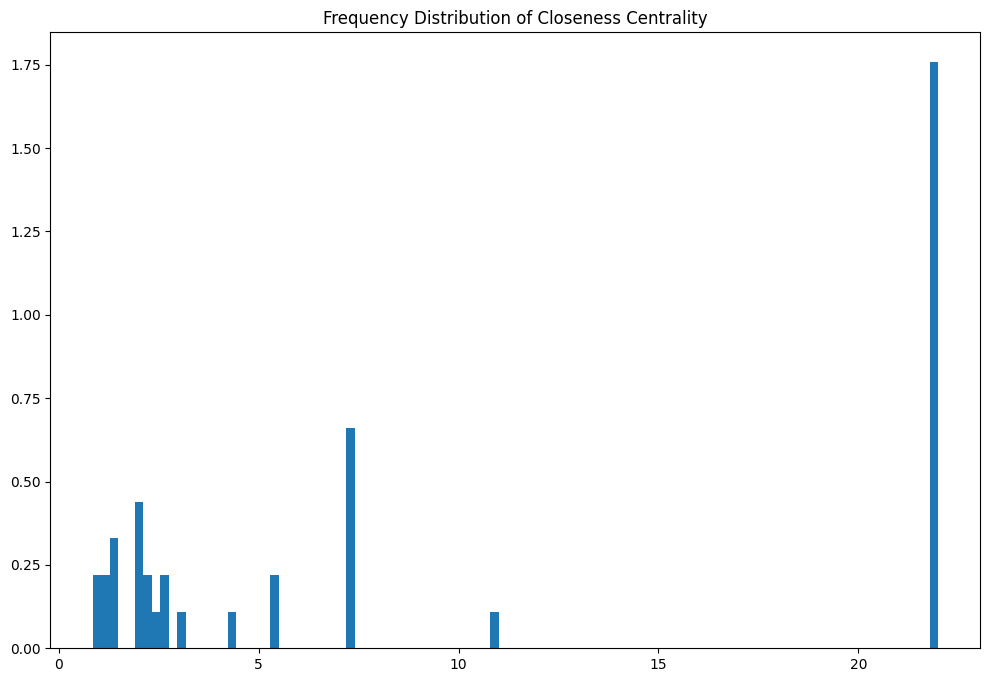

In [9]:
for graph in all_graphs[0:3]:
    graph.plot_closeness_centrality()

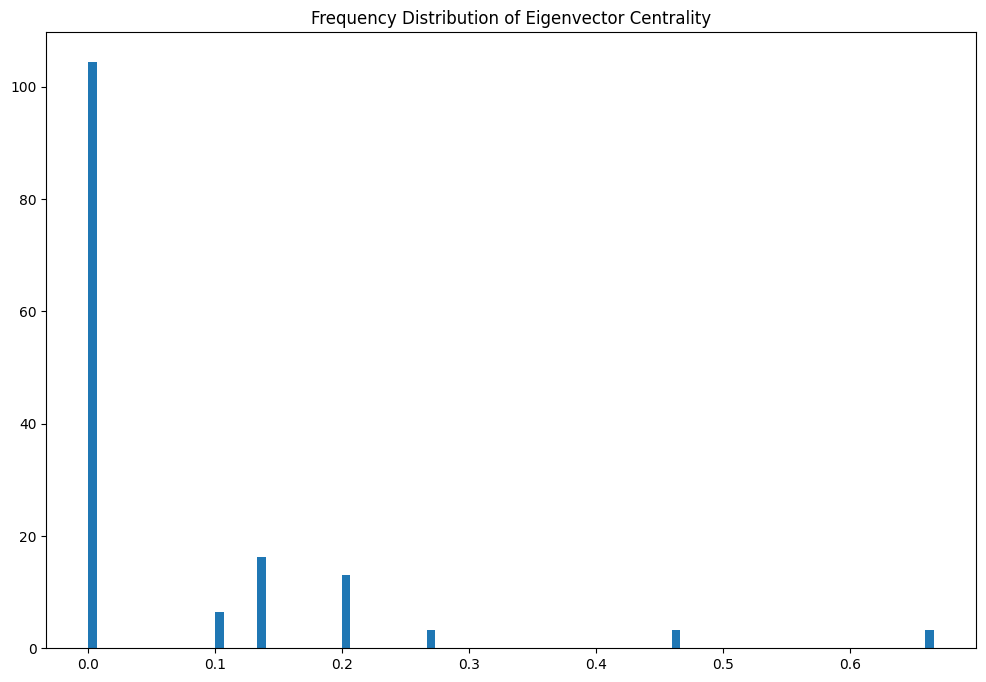

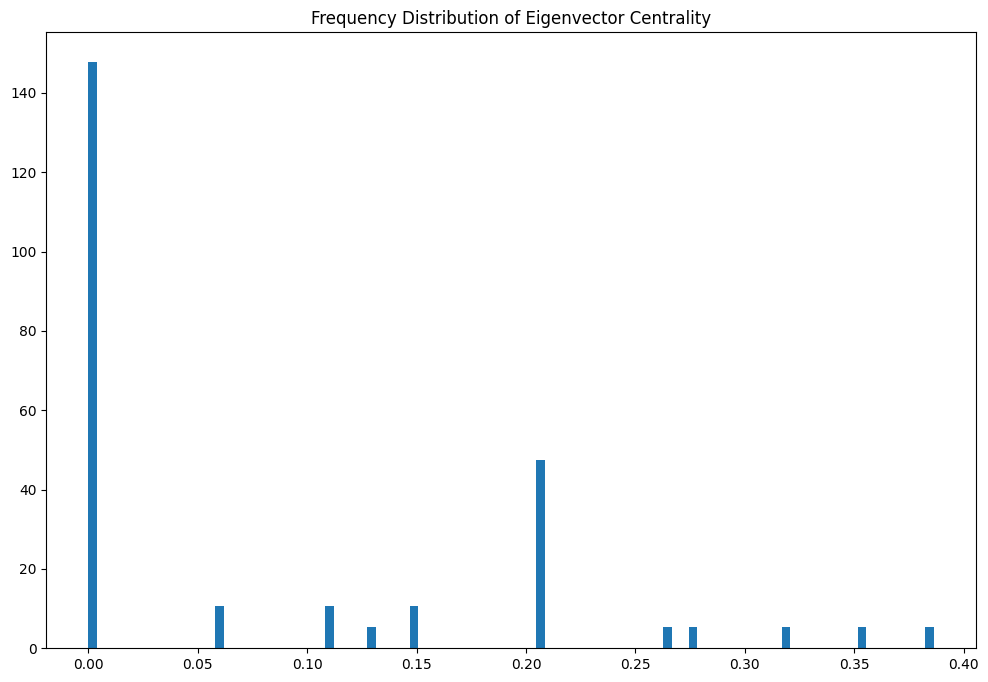

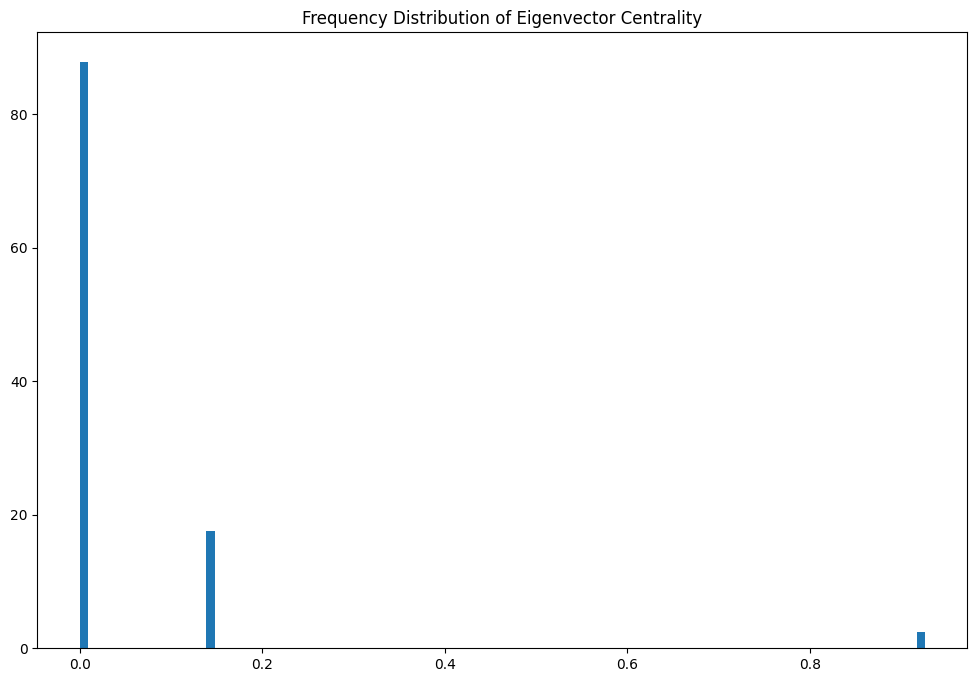

In [10]:
for graph in all_graphs[0:3]:
    graph.plot_eigenvector_centrality()

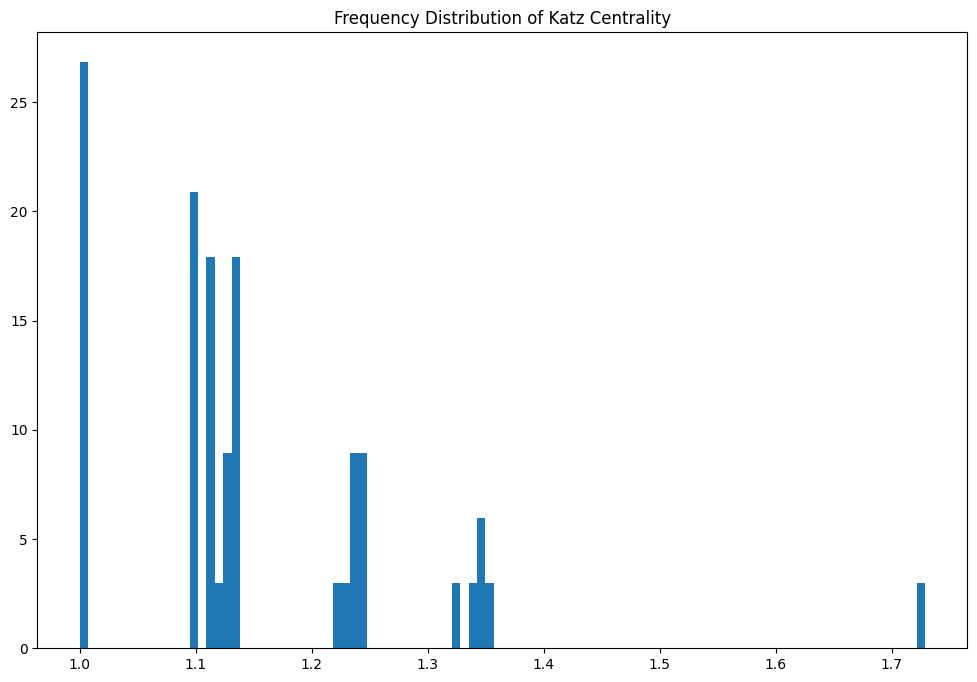

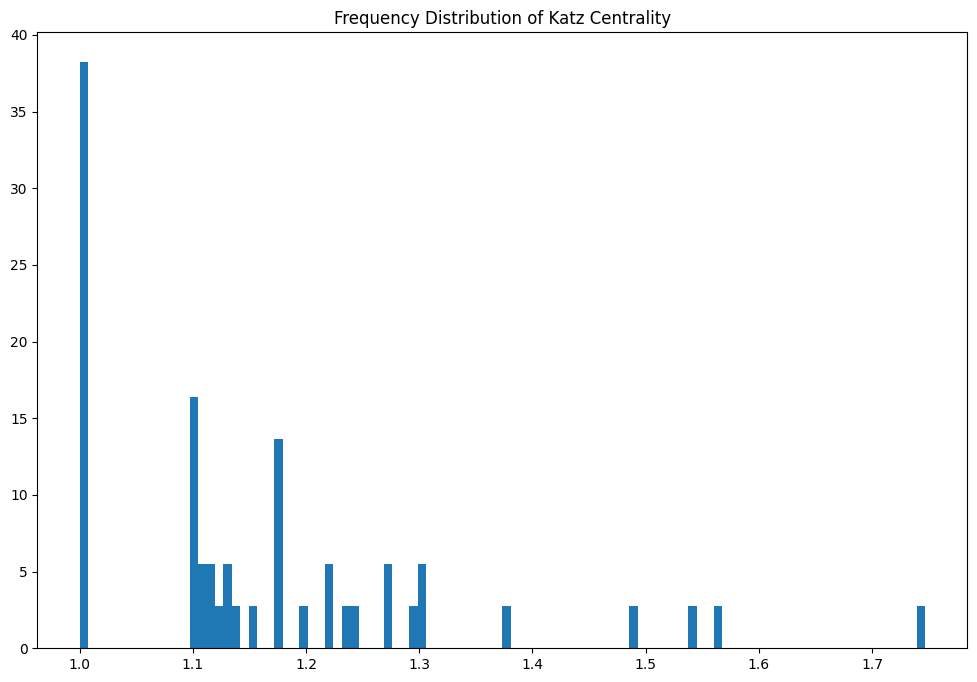

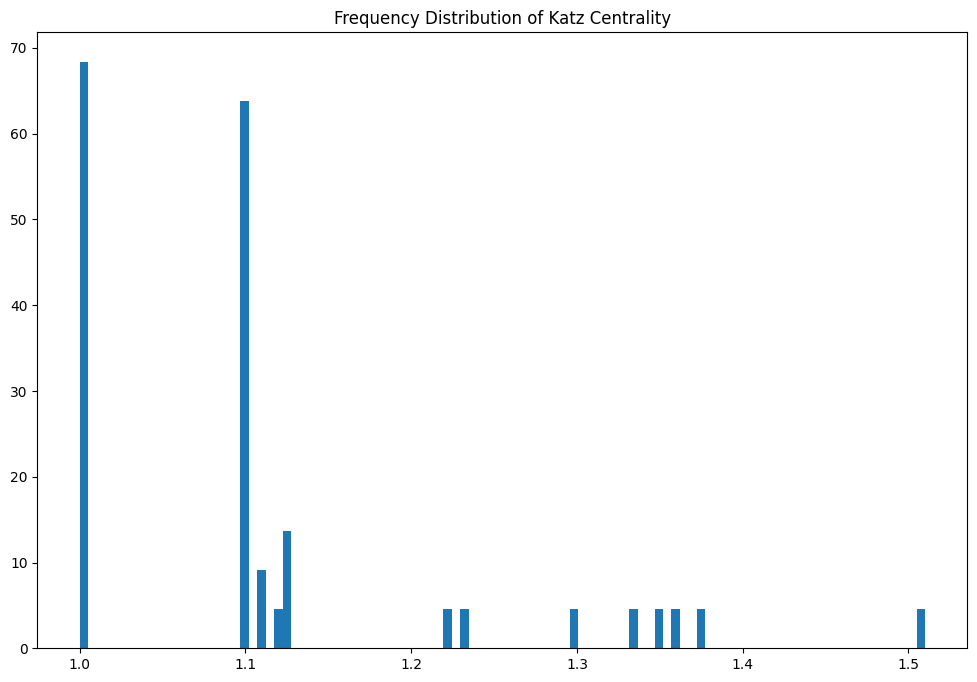

In [11]:
for graph in all_graphs[0:3]:
    graph.plot_katz_centrality()

In [12]:
# Calculates E*[tj-1, tj] = edges_from_1 and E*[tj, tj+1] = edges_from_2
common_vertices, common_edges = [], []
for i in range(len(all_graphs)-1):
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]
    vertices, edges_from_1, edges_from_2 = g1.intersection(g2)
    common_vertices.append(vertices)
    common_edges.append((edges_from_1, edges_from_2))

In [13]:
common_edges[0][0] # E*[tj-1,t]

{('1', '1'),
 ('146637', '59'),
 ('17', '1'),
 ('17', '17'),
 ('17', '32'),
 ('17', '48'),
 ('17', '72'),
 ('17', '83'),
 ('2089740', '61'),
 ('25', '61'),
 ('34', '39'),
 ('35', '58'),
 ('39', '40'),
 ('40', '59'),
 ('58', '72'),
 ('59', '59'),
 ('59', '78'),
 ('60', '72'),
 ('61', '39'),
 ('61', '58'),
 ('71', '48'),
 ('72', '48'),
 ('72', '58'),
 ('72', '9'),
 ('86', '58'),
 ('9', '72')}

In [14]:
common_edges[0][1] # E*[tj,t+1]

{('17', '49'),
 ('34', '91'),
 ('35', '71'),
 ('39', '91'),
 ('40', '146637'),
 ('40', '91'),
 ('48', '91'),
 ('49', '91'),
 ('50', '2089740'),
 ('50', '59'),
 ('50', '61'),
 ('50', '91'),
 ('55', '146637'),
 ('55', '78'),
 ('55', '91'),
 ('58', '59'),
 ('59', '59'),
 ('59', '61'),
 ('59', '83'),
 ('71', '60'),
 ('71', '91'),
 ('80', '83'),
 ('86', '78'),
 ('91', '1'),
 ('91', '71'),
 ('91', '91')}

In [15]:
assert len(common_edges) == len(all_graphs) - 1 , 'Number of intersections must be less than number of temporal graphs by 1' # we have 20 subgraphs

In [16]:
coupled_vertices_volumes = [len(common) for common in common_vertices]
coupled_edges_1_volumes = [len(edges[0]) for edges in common_edges]
coupled_edges_2_volumes = [len(edges[1]) for edges in common_edges]

In [17]:
volumes_over_time_periods = pd.DataFrame(data=[coupled_vertices_volumes,
                                         coupled_edges_1_volumes,
                                         coupled_edges_2_volumes],
                                         columns= [f'(t{i}, t{i+1})' for i in range(19)],
                                         index= ['common_vertices', 'common_edges_1', 'common_edges_2'])

In [18]:
volumes_over_time_periods

,"(t0, t1)","(t1, t2)","(t2, t3)","(t3, t4)","(t4, t5)","(t5, t6)","(t6, t7)","(t7, t8)","(t8, t9)","(t9, t10)","(t10, t11)","(t11, t12)","(t12, t13)","(t13, t14)","(t14, t15)","(t15, t16)","(t16, t17)","(t17, t18)","(t18, t19)"
common_vertices,26,19,22,53,80,100,100,106,96,65,31,54,96,101,96,133,138,74,61
common_edges_1,26,18,15,63,120,185,144,155,111,66,20,52,92,112,108,184,182,57,44
common_edges_2,26,11,12,45,91,125,128,114,83,51,18,31,94,93,51,157,135,41,33


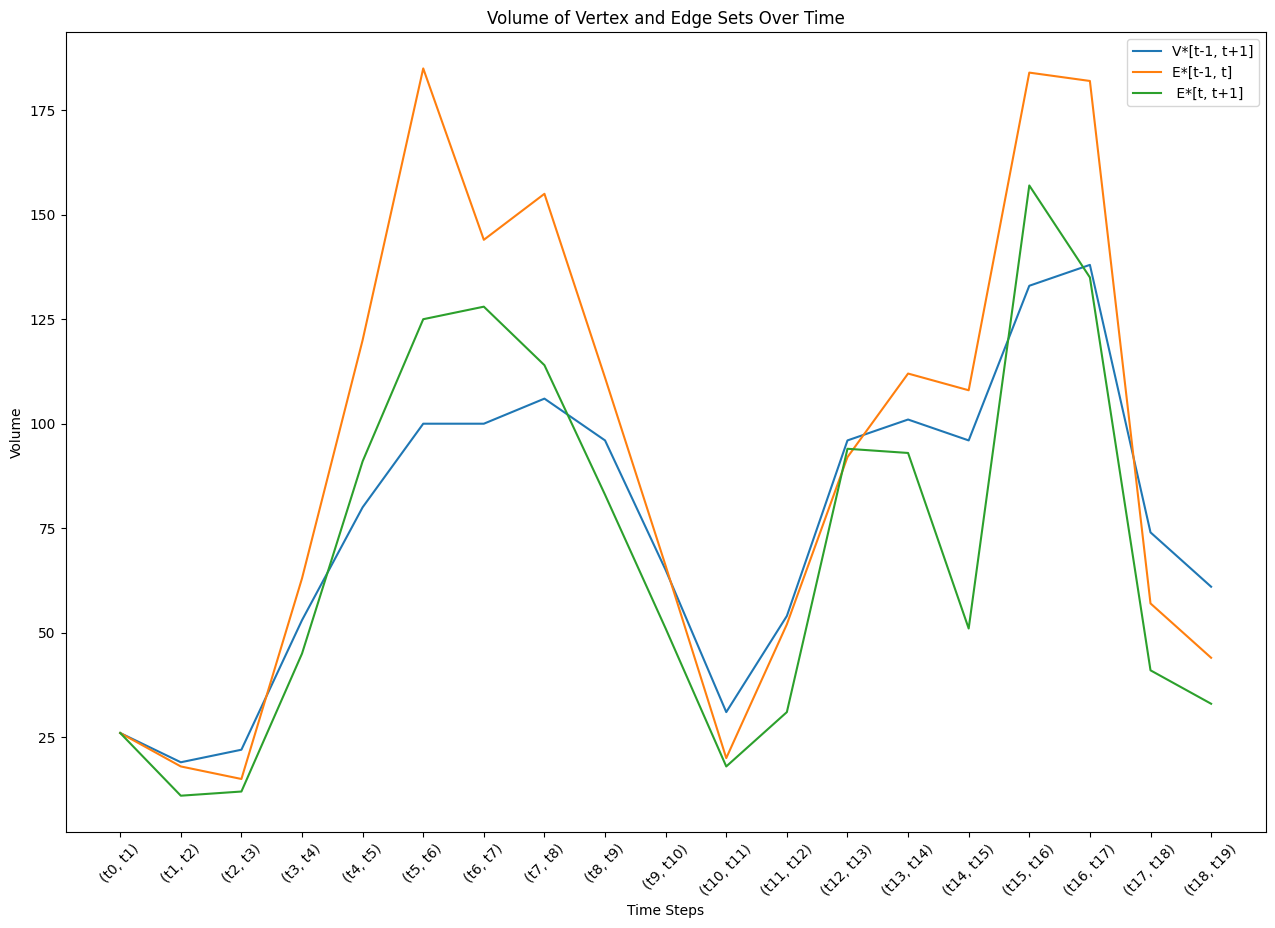

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
x_axis = volumes_over_time_periods.columns
ax.plot(x_axis, coupled_vertices_volumes, label='V*[t-1, t+1]')
ax.plot(x_axis, coupled_edges_1_volumes, label='E*[t-1, t]')
ax.plot(x_axis, coupled_edges_2_volumes, label=' E*[t, t+1]')

plt.xticks(rotation=45)
# Add labels and a title
plt.xlabel('Time Steps')
plt.ylabel('Volume')
ax.set_title('Volume of Vertex and Edge Sets Over Time')


# Show the legend to differentiate the lines
plt.legend()

###  Part 2

Question 2 (a)

SDG Similarity

In [20]:
# Uncomment to run for every pair of successive graphs

sdg_dicts = []
for i, vertices_set in enumerate(common_vertices):
    # store the graphs under study to variables
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]

    # Calculate the Sgd matrix based on the intersections of vertices between the two graphs
    sim_mat_1 = g1.sdg_for_a_set_of_vertices(vertices_set)
    sim_mat_2 = g2.sdg_for_a_set_of_vertices(vertices_set)
    sdg_dicts.append((sim_mat_1,sim_mat_2))


2 (b) Question  ---- Common Neighbours

In [21]:
# For all the pairs of successive graphs ( Uncomment the block of code below)
common_neigh_dicts = []
for i, vertices_set in enumerate(common_vertices):
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]
    dict_of_common_neigh_g1 = {}
    dict_of_common_neigh_g2 = {}
    for vertex_1, vertex_2 in list(product(vertices_set, vertices_set)):
        # Find common neighbours for the pairs of common vertices for the first graph
    
        neigh_of_vertex_1 =  g1.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g1.get_neighbors_from_adjacency_matrix(vertex_2)
    
        common_neigh_1 = len(neigh_of_vertex_1.intersection(neigh_of_vertex_2))
        dict_of_common_neigh_g1[(vertex_1, vertex_2)] = common_neigh_1
    
        #Find common neighbours for the pairs of common vertices for the second graph
        neigh_of_vertex_1 =  g2.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g2.get_neighbors_from_adjacency_matrix(vertex_2)
    
        common_neigh_2 = len(neigh_of_vertex_1.intersection(neigh_of_vertex_2))
        dict_of_common_neigh_g2[(vertex_1, vertex_2)] = common_neigh_2
    common_neigh_dicts.append((dict_of_common_neigh_g1, dict_of_common_neigh_g2))

 Questions 2(c) -- Jaccard Coefficient

In [22]:
# Do exactly the saem but for the union
# For all the pairs of successive graphs ( Uncomment the block of code below)
union_neigh_dicts = []
for i, vertices_set in enumerate(common_vertices):
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]
    dict_of_union_neigh_g1 = {}
    dict_of_union_neigh_g2 = {}
    for vertex_1, vertex_2 in product(vertices_set, vertices_set):
        # Find common neighbours for the pairs of common vertices for the first graph
    
        neigh_of_vertex_1 =  g1.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g1.get_neighbors_from_adjacency_matrix(vertex_2)
    
        union_neigh_1 = len(neigh_of_vertex_1.union(neigh_of_vertex_2))
        dict_of_union_neigh_g1[(vertex_1, vertex_2)] = union_neigh_1
    
        #Find common neighbours for the pairs of common vertices for the second graph
        neigh_of_vertex_1 =  g2.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g2.get_neighbors_from_adjacency_matrix(vertex_2)
    
        union_neigh_2 = len(neigh_of_vertex_1.union(neigh_of_vertex_2))
        dict_of_union_neigh_g2[(vertex_1, vertex_2)] = union_neigh_2
    union_neigh_dicts.append((dict_of_union_neigh_g1, dict_of_union_neigh_g2))

In [23]:
jaccard_sim_dict = {}
jaccard_sim_dicts = []


for zipped_tuples_of_dicts_of_neighbours in zip(common_neigh_dicts,union_neigh_dicts):
    successive_graphs = []
    tuple_of_common_neigh, tuple_of_union_neigh = zipped_tuples_of_dicts_of_neighbours
    for i in [0,1]:
        dict_1 = tuple_of_common_neigh[i]
        dict_2 = tuple_of_union_neigh[i]
        
        dict_1_keys = dict_1.keys() # dict_1 and dict2 have the same keys...
        for key in dict_1_keys:
            jaccard_sim_dict[key] = dict_1[key] / dict_2[key]
            
        successive_graphs.append(jaccard_sim_dict)
        
    jaccard_sim_dicts.append(successive_graphs)

Question 2(d) -- Adamic / Adar

In [24]:
# For all the pairs of successive graphs ( Uncomment the block of code below)
set_of_common_neigh_dicts = []
for i, vertices_set in enumerate(common_vertices):
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]
    dict_of_set_common_neigh_g1 = {}
    dict_of_set_common_neigh_g2 = {}
    for vertex_1, vertex_2 in list(product(vertices_set, vertices_set)):
        # Find common neighbours for the pairs of common vertices for the first graph
    
        neigh_of_vertex_1 =  g1.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g1.get_neighbors_from_adjacency_matrix(vertex_2)
    
        common_neigh_1 = neigh_of_vertex_1.intersection(neigh_of_vertex_2)
        dict_of_set_common_neigh_g1[(vertex_1, vertex_2)] = common_neigh_1
    
        #Find common neighbours for the pairs of common vertices for the second graph
        neigh_of_vertex_1 =  g2.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g2.get_neighbors_from_adjacency_matrix(vertex_2)
    
        common_neigh_2 = neigh_of_vertex_1.intersection(neigh_of_vertex_2)
        dict_of_set_common_neigh_g2[(vertex_1, vertex_2)] = common_neigh_2
    set_of_common_neigh_dicts.append((dict_of_set_common_neigh_g1, dict_of_set_common_neigh_g2))

In [25]:
adamic_sim_dicts = []
for idx, tuple_of_common_neigh_per_period in enumerate(set_of_common_neigh_dicts):
    g1_common_neigh, g2_common_neigh = tuple_of_common_neigh_per_period
    g1_adamic_sim_dict = {}
    g2_adamic_sim_dict = {}
    # Calculate adamic score for the Graph(t-1, t)
    for vertices_comb, set_of_common_neighs in g1_common_neigh.items():
        list_of_log_of_degree_node = [] # I want to gather the degrees of all shared friends
        for node in set_of_common_neighs:
            # The node will always have at least two friends because it is a shared friend between two vertices(vertices_comb)
            node_degree = len(all_graphs[idx].get_neighbors_from_adjacency_matrix(node))
            list_of_log_of_degree_node.append(np.log(node_degree))

        g1_adamic_sim_dict[vertices_comb] = sum(list_of_log_of_degree_node)
    # Calculate adamic score for the Graph(t, t+1)
    for vertices_comb, set_of_common_neighs in g2_common_neigh.items():
        list_of_log_of_degree_node = [] 
        for node in set_of_common_neighs:
            # The node will always have at least two friends because it is a shared friend between two vertices(vertices_comb)
            node_degree = len(all_graphs[idx+1].get_neighbors_from_adjacency_matrix(node))
            list_of_log_of_degree_node.append(np.log(node_degree))
        g2_adamic_sim_dict[vertices_comb] = sum(list_of_log_of_degree_node)
        
    adamic_sim_dicts.append((g1_adamic_sim_dict, g2_adamic_sim_dict))

Question 2(e) -- Preferential Attachment

In [26]:
# For all the pairs of successive graphs ( Uncomment the block of code below)
pref_att_dicts = []
for i, vertices_set in enumerate(common_vertices):
    g1 = all_graphs[i]
    g2 = all_graphs[i+1]
    dict_of_pref_att_g1 = {}
    dict_of_pref_att_g2 = {}
    for vertex_1, vertex_2 in product(vertices_set, vertices_set):
        # Find common neighbours for the pairs of common vertices for the first graph
    
        neigh_of_vertex_1 =  g1.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g1.get_neighbors_from_adjacency_matrix(vertex_2)
    
        pref_att_1 = len(neigh_of_vertex_1)*len(neigh_of_vertex_2)
        dict_of_pref_att_g1[(vertex_1, vertex_2)] = pref_att_1
    
        #Find common neighbours for the pairs of common vertices for the second graph
        neigh_of_vertex_1 =  g2.get_neighbors_from_adjacency_matrix(vertex_1)
        neigh_of_vertex_2 =  g2.get_neighbors_from_adjacency_matrix(vertex_2)
    
        pref_att_2 = len(neigh_of_vertex_1)*len(neigh_of_vertex_2)
        dict_of_pref_att_g2[(vertex_1, vertex_2)] = pref_att_2
    pref_att_dicts.append((dict_of_pref_att_g1, dict_of_pref_att_g2))

Questions 10 - 11

In [27]:
cartesian_product_of_vertices = set(product(common_vertices[0], common_vertices[0]))

In [28]:
assert len(cartesian_product_of_vertices) == (len(common_vertices[0]) ** 2), f"{len(cartesian_product_of_vertices)} != {(len(common_vertices[0]))**2}"

In [29]:
set_of_common_edges_for_first_pair_of_graphs = common_edges[0][0] | common_edges[0][1]

In [30]:
assert set_of_common_edges_for_first_pair_of_graphs.issubset(cartesian_product_of_vertices), "The set of all possible common edges derived from the intersections of graphs' common vertices is subset of the catresian product of the common vertices"

## Example of Training and Test Set

In [31]:
# Initialize lists and dictionaries to store processed DataFrames and similarity metrics.
df_list = []
sgd_all = {}
scn_all = {}
sjc_all = {}
sa_all = {}
spa_all = {}

# Loop through each time period, except the last, to process similarity metrics for pairs of graphs.
for i in range(len(time_periods) - 1):
    
    # Extract similarity metric dictionaries for the current and next time periods.
    temp_sgd_1 = sdg_dicts[i][0]
    temp_scn_1 = common_neigh_dicts[i][0]
    temp_sjc_1 = jaccard_sim_dicts[i][0]
    temp_sa_1 = adamic_sim_dicts[i][0]
    temp_spa_1 = pref_att_dicts[i][0]
    
    temp_sgd_2 = sdg_dicts[i][1]
    temp_scn_2 = common_neigh_dicts[i][1]
    temp_sjc_2 = jaccard_sim_dicts[i][1]
    temp_sa_2 = adamic_sim_dicts[i][1]
    temp_spa_2 = pref_att_dicts[i][1]

    # Generate all possible pairs (Cartesian product) of vertices for the current time period.
    product_list_tmp = []
    product_list_tmp.extend(list(product(common_vertices[i], common_vertices[i])))

    # Initialize two temporary DataFrames for each time period with the vertex pairs as index.
    tmp_df1 = pd.DataFrame(index=product_list_tmp)
    tmp_df2 = pd.DataFrame(index=product_list_tmp)

    # Reset the index so that 'index' becomes a column, preparing for merging.
    tmp_df1 = tmp_df1.reset_index()
    tmp_df2 = tmp_df2.reset_index()

    # Process and merge each similarity metric into `tmp_df1` and `tmp_df2`.
    # 1. Structural Graph Distance (sgd_sim)
    df1_1 = pd.DataFrame.from_dict(temp_sgd_1, orient='index').reset_index().rename(columns={0: 'sgd_sim'})
    tmp_df1 = tmp_df1.merge(df1_1, how='left', on='index')
    df1_2 = pd.DataFrame.from_dict(temp_sgd_2, orient='index').reset_index().rename(columns={0: 'sgd_sim'})
    tmp_df2 = tmp_df2.merge(df1_2, how='left', on='index')

    # 2. Common Neighbors (scn_sim)
    df2_1 = pd.DataFrame.from_dict(temp_scn_1, orient='index').reset_index().rename(columns={0: 'scn_sim'})
    tmp_df1 = tmp_df1.merge(df2_1, how='left', on='index')
    df2_2 = pd.DataFrame.from_dict(temp_scn_2, orient='index').reset_index().rename(columns={0: 'scn_sim'})
    tmp_df2 = tmp_df2.merge(df2_2, how='left', on='index')

    # 3. Jaccard Similarity (sjc_sim)
    df3_1 = pd.DataFrame.from_dict(temp_sjc_1, orient='index').reset_index().rename(columns={0: 'sjc_sim'})
    tmp_df1 = tmp_df1.merge(df3_1, how='left', on='index')
    df3_2 = pd.DataFrame.from_dict(temp_sjc_2, orient='index').reset_index().rename(columns={0: 'sjc_sim'})
    tmp_df2 = tmp_df2.merge(df3_2, how='left', on='index')

    # 4. Adamic/Adar Similarity (sa_sim)
    df4_1 = pd.DataFrame.from_dict(temp_sa_1, orient='index').reset_index().rename(columns={0: 'sa_sim'})
    tmp_df1 = tmp_df1.merge(df4_1, how='left', on='index')
    df4_2 = pd.DataFrame.from_dict(temp_sa_2, orient='index').reset_index().rename(columns={0: 'sa_sim'})
    tmp_df2 = tmp_df2.merge(df4_2, how='left', on='index')

    # 5. Preferential Attachment (spa_sim)
    df5_1 = pd.DataFrame.from_dict(temp_spa_1, orient='index').reset_index().rename(columns={0: 'spa_sim'})
    tmp_df1 = tmp_df1.merge(df5_1, how='left', on='index')
    df5_2 = pd.DataFrame.from_dict(temp_spa_2, orient='index').reset_index().rename(columns={0: 'spa_sim'})
    tmp_df2 = tmp_df2.merge(df5_2, how='left', on='index')

    # Fill NaN values resulting from merges with a placeholder value (-1000).
    tmp_df1 = tmp_df1.fillna(-1000)
    tmp_df2 = tmp_df2.fillna(-1000)

    # Clean the index format by removing special characters and converting to a consistent format.
    tmp_df1['index'] = tmp_df1['index'].astype(str).str.replace(r"[()']", "", regex=True).str.replace(', ', '-')
    tmp_df2['index'] = tmp_df2['index'].astype(str).str.replace(r"[()']", "", regex=True).str.replace(', ', '-')

    # Set 'index' as the DataFrame index, removing its column name for better consistency.
    tmp_df1.set_index('index', inplace=True)
    tmp_df2.set_index('index', inplace=True)
    tmp_df1.index.name = None
    tmp_df2.index.name = None

    # Append the processed DataFrames for the current time period to the main list as a tuple.
    df_list.append((tmp_df1, tmp_df2))


In [32]:
for idx, successive_graphs in enumerate(df_list):
    # Unpack each tuple in `df_list` into separate train and test graph DataFrames.
    train_graph, test_graph = successive_graphs
    
    # Initialize a new column 'target' in both train and test graphs, setting it to 0 by default.
    train_graph['target'] = 0 
    test_graph['target'] = 0
    
    # Ensure that the indices of the train and test graphs match.
    assert train_graph.index.equals(test_graph.index)
    
    # Loop through each vertex pair (index) in the train graph.
    for vertices_tuple in train_graph.index:
        # Split the vertex pair into individual vertices (strings) for easier processing, because we have indecies in str format 'a-b'
        vertice_1 = vertices_tuple.split('-')[0]
        vertice_2 = vertices_tuple.split('-')[1]
        
        # TRAIN GRAPH PROCESSING:
        # Retrieve the sets of friends (connected vertices) for each vertex in the current graph (train).
        set_of_friend_1 = set(all_graphs[idx].adjacency_list[vertice_1])
        set_of_friend_2 = set(all_graphs[idx].adjacency_list[vertice_2])

        # Check if either vertex is in the friend set of the other.
        # If they are friends, set the 'target' value to 1 in the train graph for this vertex pair.
        if vertice_1 in set_of_friend_2 or vertice_2 in set_of_friend_1:
            train_graph.loc[vertices_tuple, 'target'] = 1

        # TEST GRAPH PROCESSING:
        # Retrieve sets of friends for each vertex from the next graph in `all_graphs` (test).
        set_of_friend_1 = set(all_graphs[idx + 1].adjacency_list[vertice_1])
        set_of_friend_2 = set(all_graphs[idx + 1].adjacency_list[vertice_2])

        # If the vertices are friends in the test graph, set 'target' to 1 for this vertex pair in the test graph.
        if vertice_1 in set_of_friend_2 or vertice_2 in set_of_friend_1:
            test_graph.loc[vertices_tuple, 'target'] = 1


In [33]:
def acc(df_list, list_of_predictions, t):
    """
    Calculate the accuracy of predictions for a specific time period.

    Parameters:
    - df_list: A list of tuples, where each tuple contains two DataFrames (train and test).
    - list_of_predictions: A list of sets or lists where each entry contains predicted pairs of vertices for each time period.
    - t: An integer representing the index of the time period to evaluate.

    Returns:
    - accuracy: A float representing the calculated accuracy based on true positive rate (TPR) and true negative rate (TNR).
    """

    # Create the set of all possible vertex pairs for the given time period t.
    e0 = set(product(common_vertices[t], common_vertices[t]))
    
    # Initialize a list to store true positive indices from both train and test graphs.
    estarx = []
    
    # Retrieve the pair of train and test DataFrames for the specified time period t.
    data = df_list[t]
    train, test = data
    
    # Extract indices of the vertex pairs that are labeled as 'target' == 1 (i.e., friends) in the train graph.
    tmp_train = train[train['target'] == 1].index
    
    # Extract indices of the vertex pairs that are labeled as 'target' == 1 (i.e., friends) in the test graph.
    tmp_test = test[test['target'] == 1].index
    
    # Extend the estarx list with indices from both train and test DataFrames.
    estarx.extend(tmp_train)
    estarx.extend(tmp_test)
    
    # Convert estarx to a set to ensure uniqueness.
    estarx = set(estarx)
    
    # Retrieve the set of predicted vertex pairs for the current time period t.
    e = set(list_of_predictions[t])
    
    # Calculate the fraction of predicted pairs over the total possible pairs.
    try:
        l = len(e) / len(e0)
    except ZeroDivisionError:
        l = 0
    
    # Calculate True Positive Rate (TPR): the ratio of correctly predicted positive pairs to the total predicted positive pairs.
    try:
        tpr = len(estarx.intersection(e)) / len(e)
    except ZeroDivisionError:
        tpr = 0
    
    # Calculate True Negative Rate (TNR): the ratio of correctly predicted negative pairs to the total negative pairs.
    try:
        tnr = 1 - (len(estarx) - len(estarx.intersection(e))) / (len(e0) - len(e))
    except ZeroDivisionError:
        tnr
    
    # Calculate accuracy using the weighted sum of TPR and TNR.
    accuracy = l * tpr + (1 - l) * tnr

    return accuracy


In [34]:
# Initialize lists to store indices of predicted friend pairs in train and test DataFrames.
predictions_in_train = []
predictions_in_test = []

# Iterate over each pair of train and test DataFrames in df_list.
for df_train, df_test in df_list:
    
    # Prepare training data by dropping the target column and converting to numpy arrays.
    X_train = df_train.drop(columns=['target']).values
    y_train = df_train['target'].values
    
    # Prepare test data similarly.
    X_test = df_test.drop(columns=['target']).values
    y_test = df_test['target'].values
    
    # Initialize the Logistic Regression model with a maximum of 10,000 iterations for convergence.
    log_model = LogisticRegression(max_iter=10000)
    
    # Fit the logistic regression model using the training data.
    log_model.fit(X_train, y_train)
    
    # Make predictions on the training data.
    y_pred_on_train = log_model.predict(X_train)
    
    # Make predictions on the test data.
    y_pred_on_test = log_model.predict(X_test)
    
    # Store predictions in the respective DataFrames for train and test.
    df_train['prediction'] = y_pred_on_train
    df_test['prediction'] = y_pred_on_test
    
    # Get the indices of the predicted friend pairs (where prediction == 1) in the train DataFrame so we can feed it straight into our accuracy culculation finction
    index_of_train = df_train[df_train['prediction'] == 1].index
    
    # Do the same for train DataFrame
    index_of_test = df_test[df_test['prediction'] == 1].index
    
    # Append the indices of predicted friend pairs to the respective lists, So the format is correct for importion.
    predictions_in_train.append(index_of_train)
    predictions_in_test.append(index_of_test)


In [35]:
# Calsulate the Accuracy for the train and test accordingly
accuracy_scores_in_train = [acc(df_list, predictions_in_train, i) for i in range(len(df_list))]
accuracy_scores_in_test = [acc(df_list, predictions_in_test, i) for i in range(len(df_list))]

In [36]:
accuracy_scores_in_test

[0.8757396449704142,
 0.8642659279778393,
 0.9111570247933884,
 0.930936276254895,
 0.93734375,
 0.9454,
 0.9504,
 0.9550551797792809,
 0.9611545138888888,
 0.9493491124260355,
 0.9354838709677419,
 0.947530864197531,
 0.9618055555555555,
 0.9622586020978334,
 0.9600694444444445,
 0.9648369042908023,
 0.9697542533081286,
 0.9676771365960555,
 0.9626444504165548]

In [37]:
accuracy_scores_in_train

[0.8653846153846154,
 0.8919667590027701,
 0.902892561983471,
 0.9377002491990033,
 0.93890625,
 0.9471,
 0.9511,
 0.955500177999288,
 0.9607204861111112,
 0.9491124260355029,
 0.9292403746097815,
 0.9609053497942387,
 0.9635416666666666,
 0.9608861876286638,
 0.9688585069444444,
 0.9656283566058003,
 0.9694917034236505,
 0.9676771365960556,
 0.958882020962107]

## **1. Performance Consistency:**

* The accuracy scores for both training and test datasets are nearly identical across all time periods, indicating that the model maintains a consistent level of performance.
* Both datasets exhibit accuracy scores above 0.9, which is generally considered good performance for classification tasks.

## **2. Highest and Lowest Accuracy:**

* Highest Accuracy:
    * Both datasets reached a maximum accuracy of 0.9697 in one of the iterations.
* Lowest Accuracy:
    * The lowest recorded accuracy was 0.8642.
* The model shows robustness in maintaining accuracy above 0.9 for most iterations.

## **3. Potential Overfitting:**
* Given that the training accuracy matches closely with the test accuracy, the model does not exhibit significant signs of overfitting.
* The consistent performance across both datasets suggests that the model has effectively learned the underlying patterns without memorizing the training data.

## **4. Generalization:**
* The test accuracies vary slightly, indicating that the model's ability to generalize to unseen data is reasonable.
* The variations in accuracy scores may reflect differences in the distribution or characteristics of the test data compared to the training data.



# **Ranking the Accuracy Measurements**
To rank the accuracy measurements, we can simply sort the accuracy scores from highest to lowest. Here’s the ranking based on the provided scores:

In [41]:
# Create DataFrame for Presentation and Ranking reasons
df_accuracy_ranked = pd.DataFrame({
    'Rank': range(1, len(accuracy_scores_in_test) + 1),
    'Test': accuracy_scores_in_test,
    'Train': accuracy_scores_in_train
})

df_accuracy_melted = df_accuracy_ranked.melt(id_vars=['Rank'], 
                                               value_vars=['Test', 'Train'], 
                                               var_name='Dataset', 
                                               value_name='Accuracy Score')

df_accuracy_melted = df_accuracy_melted.drop(columns='Rank')
df_accuracy_melted = df_accuracy_melted.sort_values('Accuracy Score', ascending=False)
df_accuracy_melted = df_accuracy_melted.reset_index(drop=True).reset_index(names='Rank')
df_accuracy_melted['Rank'] += 1
df_accuracy_melted.head(10)

,Rank,Dataset,Accuracy Score
0,1,Test,0.969754
1,2,Train,0.969492
2,3,Train,0.968859
3,4,Train,0.967677
4,5,Test,0.967677
5,6,Train,0.965628
6,7,Test,0.964837
7,8,Train,0.963542
8,9,Test,0.962644
9,10,Test,0.962259


## **Conclusion**
> ### The model demonstrates strong performance in both training and test datasets, with accuracy scores consistently above 0.9. There are no significant signs of overfitting, suggesting effective learning. However, continuous ### monitoring of performance metrics and potentially refining the model could further enhance its predictive capabilities.